# Assignment 2 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Dimensionality Reduction`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified. Libraries allowed (Numpy, matplotlib)

## Datasets 
- The IIIT-CFW is database for the cartoon faces in the wild. The dataset contains 8928 annotated cartoon faces of famous personalities of the world with varying profession. Additional 1000 real faces of the public figure to study cross modal retrieval tasks, such as, Photo2Cartoon retrieval. Ref - https://cvit.iiit.ac.in/research/projects/cvit-projects/cartoonfaces
- We have sub sampled the following data for this assignment - Cartoon faces of 8 subjects and approx. 100 images for each subject. 

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q3.ipynb`.

In [1]:
# Installing Pillow Libraries
!pip install scikit-learn matplotlib Pillow

You should consider upgrading via the '/home/lenovo/anaconda3/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image

## Load Data

In [3]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [4]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [5]:
dirpath = './IIIT-CFW/'
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


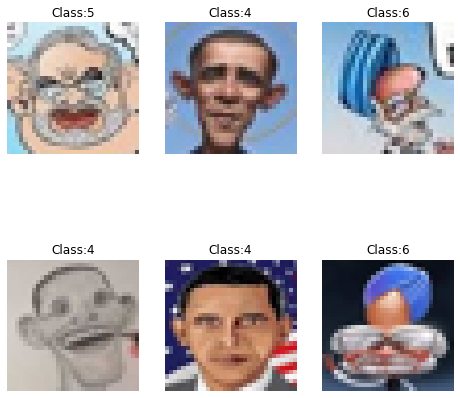

In [6]:
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

ind = np.random.randint(0,y.shape[0],6)
display_images(X[ind,...],y[ind], row=2,col=3)

In [7]:
X_vect = X.reshape(672  , 32*32*3)
print(X_vect.shape)

(672, 3072)


## Dimensionality Reduction
- Plot eigen spectrum for the data.

Percentage of variance preserved is defined as the fraction of eigen values used. As we include more principal components to describe the data, the percentage of variances preserved under the dimensionality reduction increases. 

- Plot the percentage of variances vs the number of principal components to validate the above statement.
- Try visualizing these eigen vectors. Comment on what these ghost faces represent 
- Try reconstructing images with your choice of number of principal components and visualize the reconstructed image.

Let's define reconstruction error as the frobenius norm of the difference between original and reconstructed image. 

- Plot the number of principal components vs the corresponding reconstruction error for 5 selected number of principal components of your choice.
- Using the two dominant principal values, plot the data with colors showing the labels. What do you observe?


#### Write a function that gives eigen values and eigen vectors given data

In [8]:
# write function
# write function
def get_eigen(X):
  m = np.mean(X , axis=0)
  X_centered = X - m

  X_cov = np.cov(X_centered.T)

  eigenvals , eigenvecs = np.linalg.eig(X_cov)

  inds = np.argsort(eigenvals)[::-1]

  eigenvecs = eigenvecs[:,inds]
  eigenvals = eigenvals[inds]

  return (eigenvals.astype('float64') , eigenvecs.astype('float64') , m)

#### Compute eigen values and plot eigen value spectrum

In [9]:
# eigen values and spectrum
eigenvals , eigenvects,X_mean = get_eigen(X_vect)

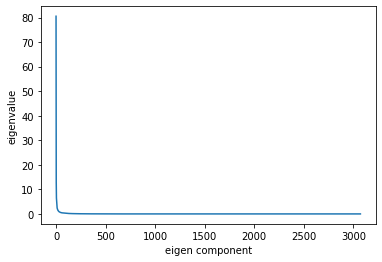

In [10]:
plt.plot(eigenvals)
plt.ylabel("eigenvalue")
plt.xlabel("eigen component")
plt.show()

#### Plot the percentage of variances vs the number of principal components

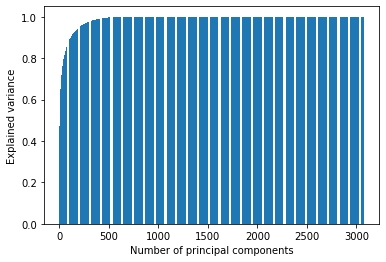

In [11]:
# plot variance vs components
eigs = []
exp_var = []
for i in range(len(eigenvals)):
    eigs.append(i+1)
    exp_var.append(sum(eigenvals[:i+1]) / sum(eigenvals))

plt.bar(eigs , exp_var)
plt.xlabel("Number of principal components")
plt.ylabel("Explained variance")
plt.show()
    

#### Visualize eigen faces(eigen vectors)

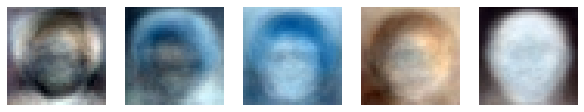

In [12]:
def plot(image,H,W,C,indices):
    #indices = [randrange(100)+1 for i in range(5)]
    pl = np.reshape(image.T,(-1,H,W,C))
    plt.figure(figsize=(25,25))
    for c,i in enumerate(indices):
        ele = pl[i]
        minim = np.min(ele)
        maxim = np.max(ele)
        ele = (ele - minim) / (maxim - minim)
        ele = np.clip(ele,0,254)
        plt.subplot(1,12,c+1)
        plt.axis('off')
        plt.imshow(ele,cmap=plt.cm.gray)
    plt.show()

indices = [randrange(12)+1 for i in range(5)]
plot(eigenvects,H,W,C, indices)


#### Reconstruction 

In [13]:
# reconstruction

def reconstruct(n_components):
    eigenvects_subset = eigenvects[:,:n_components]
    print(X_vect.shape)
    print(eigenvects_subset.shape)
    X_reduced = np.dot(X_vect - X_mean , eigenvects_subset) # pca tramsform
    print(X_reduced.shape)

    X_reconstructed = np.dot(X_reduced , eigenvects_subset.T) + X_mean
    print(X_reconstructed.shape)

    X_reconstructed_image = X_reconstructed.reshape(X_reconstructed.shape[0] , 32 , 32 , 3)

    return X_reduced,X_reconstructed_image


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
(672, 3072)
(3072, 50)
(672, 50)
(672, 3072)


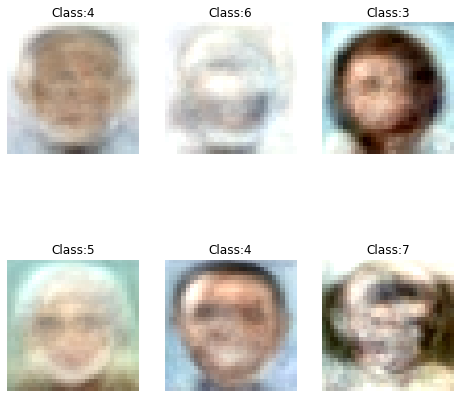

In [14]:
X_reduced, X_reconstructed_images = reconstruct(50)
ind = np.random.randint(0,y.shape[0],6)
display_images(X_reconstructed_images[ind,...],y[ind], row=2,col=3)

In [33]:
def reconstruction_error(image, reconstructed_image):
    diff_r = image[:,:,0] - reconstructed_image[:,:,0]
    r = np.linalg.norm(diff_r, ord='fro')
    diff_g = image[:,:,1] - reconstructed_image[:,:,1]
    g = np.linalg.norm(diff_g, ord='fro')
    diff_b = image[:,:,2] - reconstructed_image[:,:,2]
    b = np.linalg.norm(diff_b, ord='fro')
    return (r+g+b)/3

In [34]:
reconstruction_error(X[0],X_reconstructed_images[0])

3.5876554361684233e-12

(672, 3072)
(3072, 20)
(672, 20)
(672, 3072)
(672, 3072)
(3072, 50)
(672, 50)
(672, 3072)
(672, 3072)
(3072, 100)
(672, 100)
(672, 3072)
(672, 3072)
(3072, 200)
(672, 200)
(672, 3072)
(672, 3072)
(3072, 1000)
(672, 1000)
(672, 3072)


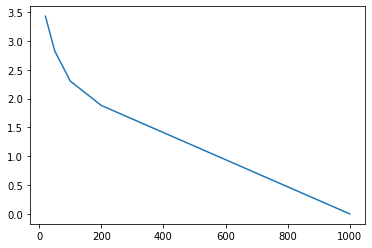

In [35]:
errors = []
n = [20,50,100,200,1000]

for en in n:
    X_reduced, X_reconstructed_images = reconstruct(en)
    errors.append(reconstruction_error(X[0],X_reconstructed_images[0]))
plt.plot(n,errors)

#### Plot data in 2D

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
(672, 3072)
(3072, 2)
(672, 2)
(672, 3072)


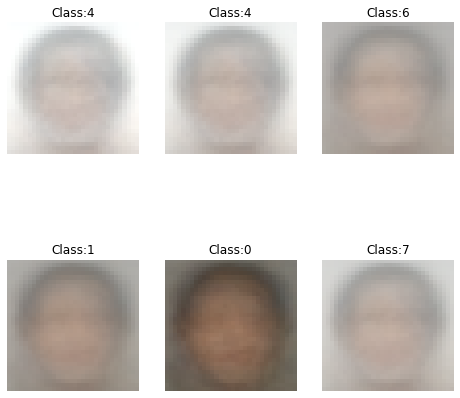

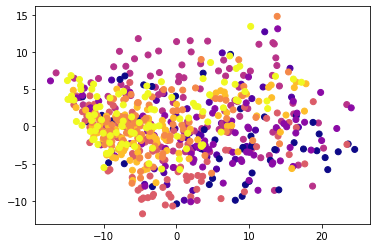

In [41]:
# plot data in 2D

X_reduced, X_reconstructed_images = reconstruct(2)
ind = np.random.randint(0,y.shape[0],6)
display_images(X_reconstructed_images[ind,...],y[ind], row=2,col=3)

plt.scatter(X_reduced[:,0],X_reduced[:,1], c=y, cmap="plasma")

In 2 dimensions, all group together so reconstructed faces kind of look like the same template.

## Lets analyze the principal components classwise
- Visualize dominant eigen faces of each of the classes.
- Print the number of principal components required to retain 90% variance for each of the classes and for the entire dataset
- Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

Example output:
```
Number of principal components required for 90% reconstruction of the:
Entire Dataset = 10 
Amitabhbachan = 10
AamirKhan = 10
...
```

In [16]:
# Load data again
X,y = load_data(dirpath)


Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


#### Visualize dominant eigen faces of each of the classes

In [18]:
# visualize
from tqdm import tqdm
classes = {}
eigen_classes = {}
for class_ in tqdm(np.unique(y)):
    classes[class_] = X[y==class_]
    x_vect = classes[class_].reshape(classes[class_].shape[0], 32*32*3)
    eigen_classes[class_] = get_eigen(x_vect)

100%|██████████| 8/8 [03:07<00:00, 23.46s/it]


In [19]:
cfw_dict_inv = {
    0: 'Amitabhbachan',
    1: 'AamirKhan',
    2: 'DwayneJohnson',
    3: 'AishwaryaRai',
    4: 'BarackObama',
    5: 'NarendraModi',
    6: 'ManmohanSingh',
    7: 'VladimirPutin'
}

Amitabhbachan


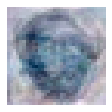

AamirKhan


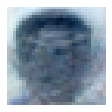

DwayneJohnson


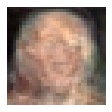

AishwaryaRai


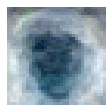

BarackObama


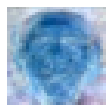

NarendraModi


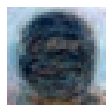

ManmohanSingh


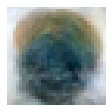

VladimirPutin


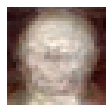

In [20]:
#visualize
for cl in classes.keys():
    eigenvals_class , eigenvects_class , _ = eigen_classes[cl]
    print(cfw_dict_inv[cl])
    plot(eigenvects_class , H , W , C , [0])
    plt.close()

#### Number of principal components required to retain 90% variance for each of the classes and for the entire dataset

In [21]:
# components required

s = sum(eigenvals)
cur_s = 0
cur_exp_var = 0
num = 0
for eig_val in eigenvals:
    cur_s += eig_val
    cur_exp_var = cur_s / s
    num += 1
    if cur_exp_var >= 0.9:
        break

print("Number of principle components required: ")
print("for all data:" , num)


var_dict = {}
for cl in classes.keys():
    eigenvals_class , _ , _ = eigen_classes[cl]
    s = sum(eigenvals_class)
    cur_exp_var = 0
    cur_s = 0
    num = 0
    for eig_val in eigenvals_class:
        cur_s += eig_val
        cur_exp_var = cur_s / s
        num += 1
        if cur_exp_var >= 0.9:
            var_dict[cl] = num
            break
    

for cl in var_dict.keys():
    print("class: " , cfw_dict_inv[cl] + ":" , var_dict[cl])


Number of principle components required: 
for all data: 115
class:  Amitabhbachan: 21
class:  AamirKhan: 24
class:  DwayneJohnson: 28
class:  AishwaryaRai: 36
class:  BarackObama: 43
class:  NarendraModi: 57
class:  ManmohanSingh: 50
class:  VladimirPutin: 44


#### Analysis : Are the number of components same for entire dataset and each of the classes. If yes why? If not why?


They are not the same across classes since the entire data would have a lot of variance amongst classes and so more features are required to distinguish each class but within a class there would be more similar features.

## Linear Regression (continued)
1. Perform linear regression on below datapoints
2. Use PCA for dimensionality reduction on this datapoints and then perform Linear regression.
3. Perform this experiment on different number of components and report the score for linear regression. Plot the graph of [1-200] principal components vs regression score. What do you observe?

Note :- Can use inbuilt functions for Linear Regression and PCA for this question

In [25]:
# datapoints
X,_ = load_data(dirpath)
X = X.reshape((X.shape[0],-1))
label = np.array([randrange((32*32*3)) for i in range(5)])
label = np.mean(X[:,label], axis = 1)
print(label.shape)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)
(672,)


In [46]:
X.shape

(672, 3072)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [33]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,label,test_size=0.1,random_state=0) 

def linear_regression_pca(n_components):

    pca = PCA(n_components=n_components)
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    pca = PCA(n_components=n_components).fit(X_train_scaled)
    X_train_reduced = pca.transform(X_train_scaled)

    X_scaled_test = scaler.transform(X_test)
    X_reduced_test = pca.transform(X_scaled_test)
    
    reg_model = LinearRegression().fit(X_train_reduced , y_train)
    return(reg_model.score(X_reduced_test , y_test))


In [34]:
scores = []
for i in tqdm(range(1,201)):
    scores.append(linear_regression_pca(i))

100%|██████████| 200/200 [00:47<00:00,  4.18it/s]


Text(0.5, 0, '# of pca components')

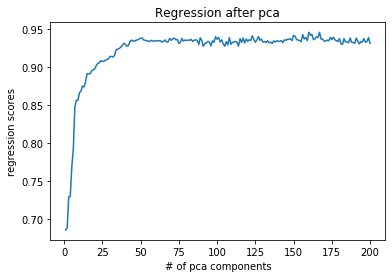

In [37]:
plt.plot(range(1,201),scores)
plt.title("Regression after pca")
plt.ylabel("regression scores")
plt.xlabel("# of pca components")

Regressions score incerases as number of components increases as with more data it is easier to get a better prediction and once 100 ish components are used after that the other features are not as useful and dont help make the predictions too much better.